## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Morphology of Femoral Knee Cartilage](https://sbonaretti.github.io/pyKNEEr/morphology.html)

Morphology quantifications of femoral cartilage are:  

- *Thickness*, computed in two steps:  
  - Separation of subcondral surface and articular surface of the cartilage
  - Calculation of the distance between the two surfaces using a nearest neighbor method [1]

- *Volume*, calculated as the volume of the cartilage mask multiplied by the image resolution

---

*Automatic data download for the reproducibility of this notebook:*
- Download input images from Zenodo and image file list from GitHub:

In [ ]:
import os
import wget
from zipfile import ZipFile 

In [ ]:
# local folder  
local_folder_name  = "./OAI2/"
# Zenodo variables
input_URL          = "https://zenodo.org/record/2583184/files/"
zipped_folder_name = "OAI2_segmented.zip" 
# GitHub variables
raw_url            = "https://raw.githubusercontent.com/sbonaretti/pyKNEEr/master/publication/data/"
input_file_name    = "image_list_morphology_OAI2_BL.txt"

In [ ]:
# create local folder for dataset
if not os.path.isdir(local_folder_name):
    os.mkdir(local_folder_name)
    print ("folder " + local_folder_name + " created")

In [ ]:
# download zipped folder from Zenodo
wget.download(input_URL + zipped_folder_name, local_folder_name + zipped_folder_name) 

In [ ]:
# unzip folder
with ZipFile(local_folder_name + zipped_folder_name, 'r') as zip: 
    zip.extractall(local_folder_name) 

In [ ]:
# download input file from GitHub
wget.download(raw_url + input_file_name, "./" + input_file_name)

---

## Import packages

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from pykneer import pykneer_io        as io
from pykneer import morphology_for_nb as morph
%matplotlib inline

## Image information

Inputs:   
- `input_file_name` contains the list of femoral cartilage masks
- `thickness_algo` is the algorithm used to calculate cartilage thickness
- `n_of_cores` is the number of cores used for computations (computations are parallelized for speed)
- `output_file_name_thickness` contains the table with average and standard deviation of thickness
- `output_file_name_volume` contains the table with average volumes

In [3]:
# input_file_name            = "./image_list_morphology_OAI2_BL.txt" # commented out because downloaded from GitHub
thickness_algo             = 1 # 1 for nearest neighbor on bone-cartilage surface 
                               # 2 for nearest neighbor on articular surface
n_of_cores                 = 10
output_file_name_thickness = "thickness_OAI2_BL.csv"
output_file_name_volume    = "volume_OAI2_BL.csv"

#### Read image data
- `image_data` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
image_data = io.load_image_data_morphology(input_file_name)

-> image information loaded


---

## Cartilage Thickness

### Separating subcondral surface and articular surface of cartilage

To calculate cartilage thickness, first the cartilage surface is extracted from the binary mask. Then subcondral surface and articular surface are divided in two separate point clouds

In [5]:
morph.separate_cartilage_surfaces(image_data, n_of_cores)

004_BL_prep_fc.mha
001_BL_prep_fc.mha
007_BL_prep_fc.mha
010_BL_prep_fc.mha
022_BL_prep_fc.mha
013_BL_prep_fc.mha
016_BL_prep_fc.mha
025_BL_prep_fc.mha
019_BL_prep_fc.mha
028_BL_prep_fc.mha
011_BL_prep_fc.mha
023_BL_prep_fc.mha
017_BL_prep_fc.mha
026_BL_prep_fc.mha
005_BL_prep_fc.mha
029_BL_prep_fc.mha
008_BL_prep_fc.mha
020_BL_prep_fc.mha
002_BL_prep_fc.mha
014_BL_prep_fc.mha
024_BL_prep_fc.mha
012_BL_prep_fc.mha
031_BL_prep_fc.mha
030_BL_prep_fc.mha
018_BL_prep_fc.mha
009_BL_prep_fc.mha
027_BL_prep_fc.mha
021_BL_prep_fc.mha
003_BL_prep_fc.mha
006_BL_prep_fc.mha
015_BL_prep_fc.mha
034_BL_prep_fc.mha
037_BL_prep_fc.mha
040_BL_prep_fc.mha
043_BL_prep_fc.mha
046_BL_prep_fc.mha
032_BL_prep_fc.mha
049_BL_prep_fc.mha
052_BL_prep_fc.mha
055_BL_prep_fc.mha
058_BL_prep_fc.mha
044_BL_prep_fc.mha
038_BL_prep_fc.mha
035_BL_prep_fc.mha
033_BL_prep_fc.mha
047_BL_prep_fc.mha
059_BL_prep_fc.mha
056_BL_prep_fc.mha
050_BL_prep_fc.mha
045_BL_prep_fc.mha
041_BL_prep_fc.mha
053_BL_prep_fc.mha
039_BL_prep_

#### Visual check 
Subcondral bone surface (yellow) and articular surface (blue) are visualized as flattened point clouds. The flattening is with respect to a cylinder interpolated into the cartilage surface [2]

001_BL_prep_fc.mha
002_BL_prep_fc.mha
003_BL_prep_fc.mha
004_BL_prep_fc.mha
005_BL_prep_fc.mha
006_BL_prep_fc.mha
007_BL_prep_fc.mha
008_BL_prep_fc.mha
009_BL_prep_fc.mha
010_BL_prep_fc.mha
011_BL_prep_fc.mha
012_BL_prep_fc.mha
013_BL_prep_fc.mha
014_BL_prep_fc.mha
015_BL_prep_fc.mha
016_BL_prep_fc.mha
017_BL_prep_fc.mha
018_BL_prep_fc.mha
019_BL_prep_fc.mha
020_BL_prep_fc.mha
021_BL_prep_fc.mha
022_BL_prep_fc.mha
023_BL_prep_fc.mha
024_BL_prep_fc.mha
025_BL_prep_fc.mha
026_BL_prep_fc.mha
027_BL_prep_fc.mha
028_BL_prep_fc.mha
029_BL_prep_fc.mha
030_BL_prep_fc.mha
031_BL_prep_fc.mha
032_BL_prep_fc.mha
033_BL_prep_fc.mha
034_BL_prep_fc.mha
035_BL_prep_fc.mha
036_BL_prep_fc.mha
037_BL_prep_fc.mha
038_BL_prep_fc.mha
039_BL_prep_fc.mha
040_BL_prep_fc.mha
041_BL_prep_fc.mha
042_BL_prep_fc.mha
043_BL_prep_fc.mha
044_BL_prep_fc.mha
045_BL_prep_fc.mha
046_BL_prep_fc.mha
047_BL_prep_fc.mha
048_BL_prep_fc.mha
049_BL_prep_fc.mha
050_BL_prep_fc.mha
051_BL_prep_fc.mha
052_BL_prep_fc.mha
053_BL_prep_

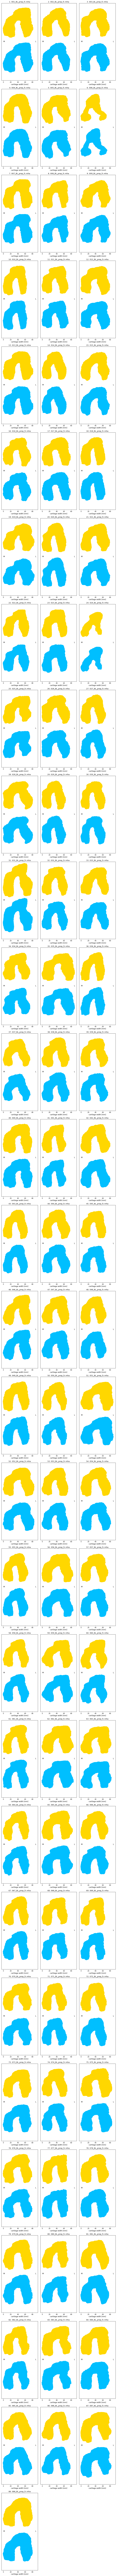

In [6]:
morph.show_cartilage_surfaces(image_data)

### Calculating cartilage thickness

Assign the chosen algorithm 

In [7]:
morph.algorithm(image_data, thickness_algo)

Calculate thickness

In [8]:
morph.calculate_thickness(image_data, n_of_cores)

001_BL_prep_fc.mha
016_BL_prep_fc.mha
025_BL_prep_fc.mha
013_BL_prep_fc.mha
010_BL_prep_fc.mha
004_BL_prep_fc.mha
007_BL_prep_fc.mha
022_BL_prep_fc.mha
019_BL_prep_fc.mha
028_BL_prep_fc.mha
011_BL_prep_fc.mha
023_BL_prep_fc.mha
017_BL_prep_fc.mha
026_BL_prep_fc.mha
005_BL_prep_fc.mha
024_BL_prep_fc.mha
008_BL_prep_fc.mha
029_BL_prep_fc.mha
020_BL_prep_fc.mha
012_BL_prep_fc.mha
002_BL_prep_fc.mha
014_BL_prep_fc.mha
031_BL_prep_fc.mha
030_BL_prep_fc.mha
018_BL_prep_fc.mha
009_BL_prep_fc.mha
027_BL_prep_fc.mha
021_BL_prep_fc.mha
015_BL_prep_fc.mha
006_BL_prep_fc.mha
003_BL_prep_fc.mha
034_BL_prep_fc.mha
032_BL_prep_fc.mha
037_BL_prep_fc.mha
040_BL_prep_fc.mha
043_BL_prep_fc.mha
046_BL_prep_fc.mha
049_BL_prep_fc.mha
052_BL_prep_fc.mha
044_BL_prep_fc.mha
038_BL_prep_fc.mha
033_BL_prep_fc.mha
035_BL_prep_fc.mha
055_BL_prep_fc.mha
058_BL_prep_fc.mha
050_BL_prep_fc.mha
059_BL_prep_fc.mha
045_BL_prep_fc.mha
056_BL_prep_fc.mha
047_BL_prep_fc.mha
061_BL_prep_fc.mha
039_BL_prep_fc.mha
041_BL_prep_

### Visualizing cartilage thickness

#### MAP: Thickness is represented as a colormap on the flattened cartilage [2]

001_BL_prep_fc.mha
002_BL_prep_fc.mha
003_BL_prep_fc.mha
004_BL_prep_fc.mha
005_BL_prep_fc.mha
006_BL_prep_fc.mha
007_BL_prep_fc.mha
008_BL_prep_fc.mha
009_BL_prep_fc.mha
010_BL_prep_fc.mha
011_BL_prep_fc.mha
012_BL_prep_fc.mha
013_BL_prep_fc.mha
014_BL_prep_fc.mha
015_BL_prep_fc.mha
016_BL_prep_fc.mha
017_BL_prep_fc.mha
018_BL_prep_fc.mha
019_BL_prep_fc.mha
020_BL_prep_fc.mha
021_BL_prep_fc.mha
022_BL_prep_fc.mha
023_BL_prep_fc.mha
024_BL_prep_fc.mha
025_BL_prep_fc.mha
026_BL_prep_fc.mha
027_BL_prep_fc.mha
028_BL_prep_fc.mha
029_BL_prep_fc.mha
030_BL_prep_fc.mha
031_BL_prep_fc.mha
032_BL_prep_fc.mha
033_BL_prep_fc.mha
034_BL_prep_fc.mha
035_BL_prep_fc.mha
036_BL_prep_fc.mha
037_BL_prep_fc.mha
038_BL_prep_fc.mha
039_BL_prep_fc.mha
040_BL_prep_fc.mha
041_BL_prep_fc.mha
042_BL_prep_fc.mha
043_BL_prep_fc.mha
044_BL_prep_fc.mha
045_BL_prep_fc.mha
046_BL_prep_fc.mha
047_BL_prep_fc.mha
048_BL_prep_fc.mha
049_BL_prep_fc.mha
050_BL_prep_fc.mha
051_BL_prep_fc.mha
052_BL_prep_fc.mha
053_BL_prep_

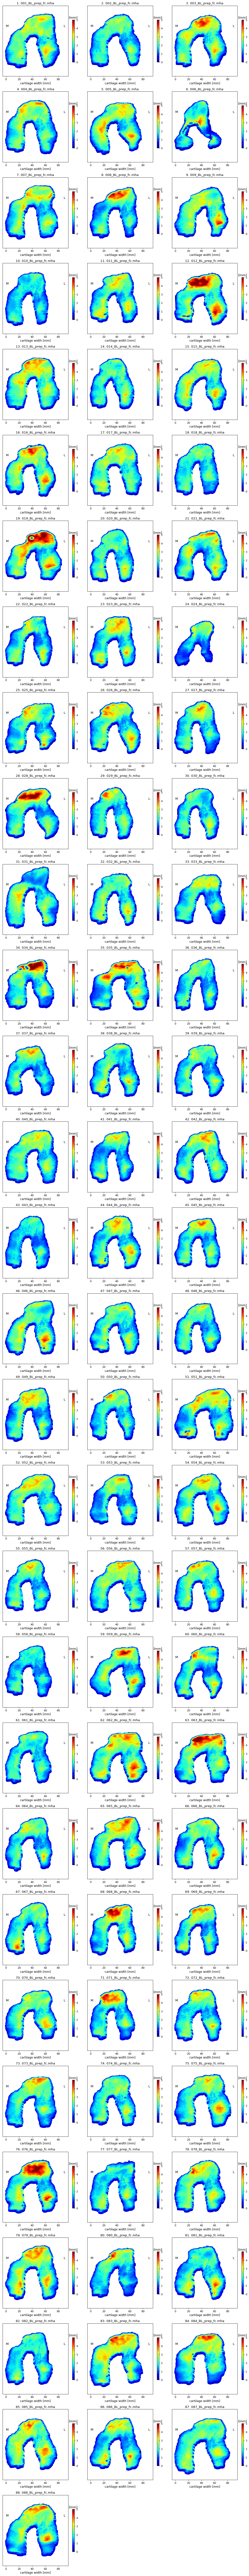

In [9]:
morph.show_thickness_maps(image_data)

#### GRAPH: Dots represent the average value of cartilage thickness per image; bars represents the standard deviation

<Figure size 1296x576 with 0 Axes>

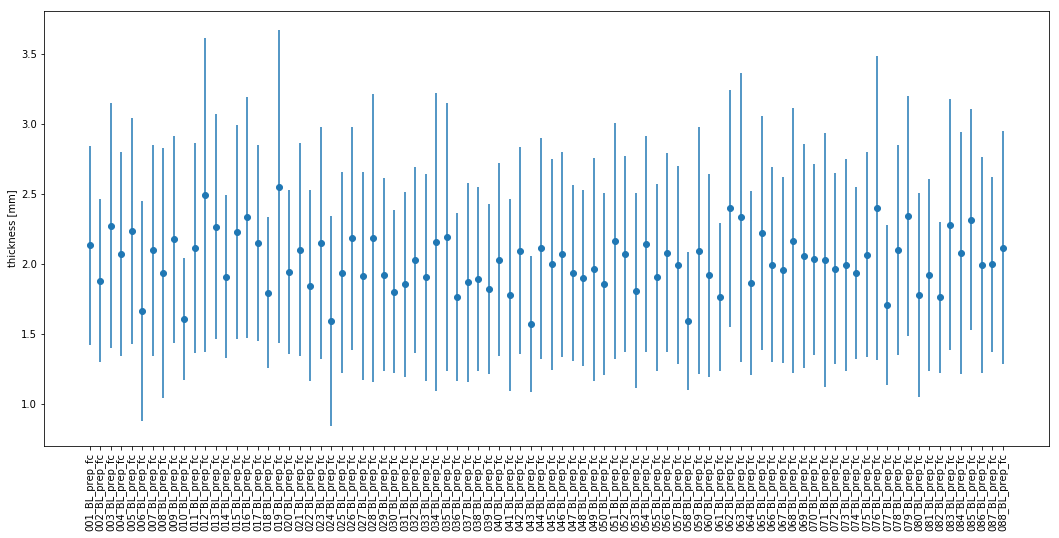

In [10]:
morph.show_thickness_graph(image_data)

#### TABLE: Average and standard deviation of cartilage thickness per image
The table is saved as a .csv file for subsequent analyisis

In [11]:
table = morph.show_thickness_table(image_data, output_file_name_thickness)
display(table)

Table saved as: thickness_OAI2_BL.csv


Subjects  averageThickness  std.dev
1   001_BL_prep_fc_thickness_1              2.13     0.71
2   002_BL_prep_fc_thickness_1              1.88     0.58
3   003_BL_prep_fc_thickness_1              2.27     0.88
4   004_BL_prep_fc_thickness_1              2.08     0.73
5   005_BL_prep_fc_thickness_1              2.24     0.81
6   006_BL_prep_fc_thickness_1              1.67     0.79
7   007_BL_prep_fc_thickness_1              2.10     0.76
8   008_BL_prep_fc_thickness_1              1.94     0.89
9   009_BL_prep_fc_thickness_1              2.18     0.74
10  010_BL_prep_fc_thickness_1              1.61     0.44
11  011_BL_prep_fc_thickness_1              2.12     0.75
12  012_BL_prep_fc_thickness_1              2.49     1.12
13  013_BL_prep_fc_thickness_1              2.27     0.80
14  014_BL_prep_fc_thickness_1              1.91     0.58
15  015_BL_prep_fc_thickness_1              2.23     0.77
16  016_BL_prep_fc_thickness_1              2.33     0.86
17  017_BL_prep_fc_thickness_1              2.15     0.70
18  018_BL_prep_fc_thickness_1              1.80     0.54
19  019_BL_prep_fc_thickness_1              2.55     1.12
20  020_BL_prep_fc_thickness_1              1.94     0.59
21  021_BL_prep_fc_thickness_1              2.10     0.76
22  022_BL_prep_fc_thickness_1              1.85     0.68
23  023_BL_prep_fc_thickness_1              2.15     0.83
24  024_BL_prep_fc_thickness_1              1.59     0.75
25  025_BL_prep_fc_thickness_1              1.94     0.72
26  026_BL_prep_fc_thickness_1              2.18     0.80
27  027_BL_prep_fc_thickness_1              1.91     0.74
28  028_BL_prep_fc_thickness_1              2.19     1.03
29  029_BL_prep_fc_thickness_1              1.92     0.69
30  030_BL_prep_fc_thickness_1              1.80     0.58
31  031_BL_prep_fc_thickness_1              1.85     0.66
32  032_BL_prep_fc_thickness_1              2.03     0.66
33  033_BL_prep_fc_thickness_1              1.91     0.74
34  034_BL_prep_fc_thickness_1              2.16     1.06
35  035_BL_prep_fc_thickness_1              2.19     0.96
36  036_BL_prep_fc_thickness_1              1.77     0.60
37  037_BL_prep_fc_thickness_1              1.87     0.71
38  038_BL_prep_fc_thickness_1              1.89     0.66
39  039_BL_prep_fc_thickness_1              1.82     0.61
40  040_BL_prep_fc_thickness_1              2.03     0.69
41  041_BL_prep_fc_thickness_1              1.78     0.69
42  042_BL_prep_fc_thickness_1              2.10     0.74
43  043_BL_prep_fc_thickness_1              1.57     0.49
44  044_BL_prep_fc_thickness_1              2.11     0.79
45  045_BL_prep_fc_thickness_1              2.00     0.76
46  046_BL_prep_fc_thickness_1              2.07     0.73
47  047_BL_prep_fc_thickness_1              1.94     0.63
48  048_BL_prep_fc_thickness_1              1.90     0.63
49  049_BL_prep_fc_thickness_1              1.97     0.80
50  050_BL_prep_fc_thickness_1              1.86     0.65
51  051_BL_prep_fc_thickness_1              2.16     0.85
52  052_BL_prep_fc_thickness_1              2.07     0.70
53  053_BL_prep_fc_thickness_1              1.81     0.70
54  054_BL_prep_fc_thickness_1              2.15     0.77
55  055_BL_prep_fc_thickness_1              1.91     0.67
56  056_BL_prep_fc_thickness_1              2.08     0.71
57  057_BL_prep_fc_thickness_1              2.00     0.71
58  058_BL_prep_fc_thickness_1              1.59     0.49
59  059_BL_prep_fc_thickness_1              2.10     0.88
60  060_BL_prep_fc_thickness_1              1.92     0.73
61  061_BL_prep_fc_thickness_1              1.77     0.53
62  062_BL_prep_fc_thickness_1              2.40     0.85
63  063_BL_prep_fc_thickness_1              2.34     1.03
64  064_BL_prep_fc_thickness_1              1.87     0.66
65  065_BL_prep_fc_thickness_1              2.22     0.83
66  066_BL_prep_fc_thickness_1              2.00     0.70
67  067_BL_prep_fc_thickness_1              1.96     0.67
68  068_BL_prep_fc_thickness_1              2.17     0.95
69  069_BL_prep_fc_t

---

## Cartilage Volume

Calculate cartilage volume

In [12]:
morph.calculate_volume(image_data)

001_BL_prep_fc.mha
002_BL_prep_fc.mha
003_BL_prep_fc.mha
004_BL_prep_fc.mha
005_BL_prep_fc.mha
006_BL_prep_fc.mha
007_BL_prep_fc.mha
008_BL_prep_fc.mha
009_BL_prep_fc.mha
010_BL_prep_fc.mha
011_BL_prep_fc.mha
012_BL_prep_fc.mha
013_BL_prep_fc.mha
014_BL_prep_fc.mha
015_BL_prep_fc.mha
016_BL_prep_fc.mha
017_BL_prep_fc.mha
018_BL_prep_fc.mha
019_BL_prep_fc.mha
020_BL_prep_fc.mha
021_BL_prep_fc.mha
022_BL_prep_fc.mha
023_BL_prep_fc.mha
024_BL_prep_fc.mha
025_BL_prep_fc.mha
026_BL_prep_fc.mha
027_BL_prep_fc.mha
028_BL_prep_fc.mha
029_BL_prep_fc.mha
030_BL_prep_fc.mha
031_BL_prep_fc.mha
032_BL_prep_fc.mha
033_BL_prep_fc.mha
034_BL_prep_fc.mha
035_BL_prep_fc.mha
036_BL_prep_fc.mha
037_BL_prep_fc.mha
038_BL_prep_fc.mha
039_BL_prep_fc.mha
040_BL_prep_fc.mha
041_BL_prep_fc.mha
042_BL_prep_fc.mha
043_BL_prep_fc.mha
044_BL_prep_fc.mha
045_BL_prep_fc.mha
046_BL_prep_fc.mha
047_BL_prep_fc.mha
048_BL_prep_fc.mha
049_BL_prep_fc.mha
050_BL_prep_fc.mha
051_BL_prep_fc.mha
052_BL_prep_fc.mha
053_BL_prep_

### Visualizing cartilage volume

#### GRAPH: Dots represent cartilage volume per image

<Figure size 1296x576 with 0 Axes>

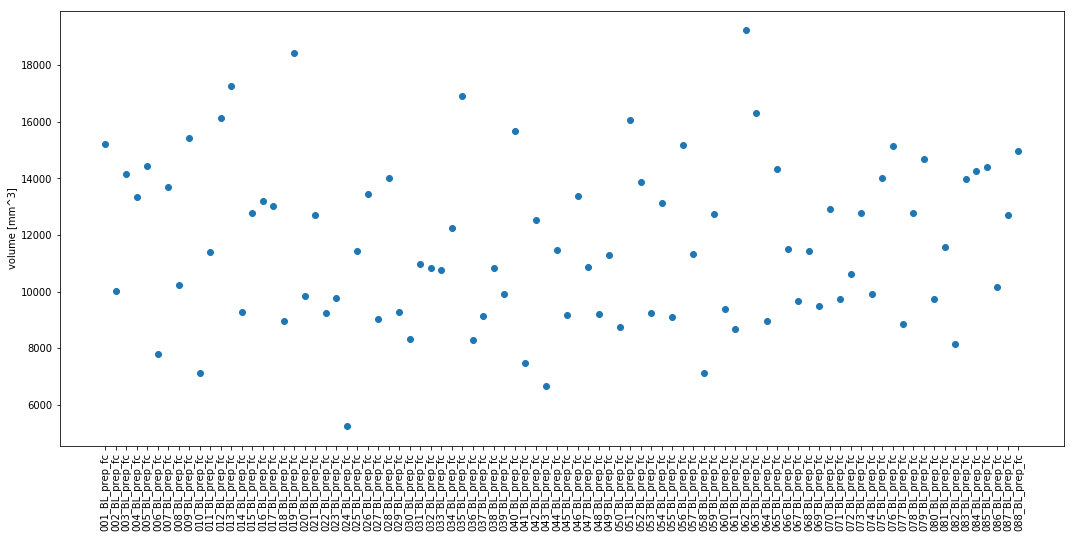

In [13]:
morph.show_volume_graph(image_data)

#### TABLE: Cartilage volume per image
The table is saved as a .csv file for subsequent analyisis

In [14]:
table = morph.show_volume_table(image_data, output_file_name_volume)
display(table)

Table saved as: volume_OAI2_BL.csv


Subjects  Volume
1   001_BL_prep_fc   15218
2   002_BL_prep_fc   10030
3   003_BL_prep_fc   14165
4   004_BL_prep_fc   13361
5   005_BL_prep_fc   14455
6   006_BL_prep_fc    7820
7   007_BL_prep_fc   13682
8   008_BL_prep_fc   10244
9   009_BL_prep_fc   15417
10  010_BL_prep_fc    7132
11  011_BL_prep_fc   11406
12  012_BL_prep_fc   16124
13  013_BL_prep_fc   17276
14  014_BL_prep_fc    9274
15  015_BL_prep_fc   12791
16  016_BL_prep_fc   13192
17  017_BL_prep_fc   13033
18  018_BL_prep_fc    8979
19  019_BL_prep_fc   18419
20  020_BL_prep_fc    9842
21  021_BL_prep_fc   12728
22  022_BL_prep_fc    9248
23  023_BL_prep_fc    9788
24  024_BL_prep_fc    5271
25  025_BL_prep_fc   11446
26  026_BL_prep_fc   13440
27  027_BL_prep_fc    9053
28  028_BL_prep_fc   14021
29  029_BL_prep_fc    9273
30  030_BL_prep_fc    8321
31  031_BL_prep_fc   10980
32  032_BL_prep_fc   10824
33  033_BL_prep_fc   10770
34  034_BL_prep_fc   12251
35  035_BL_prep_fc   16908
36  036_BL_prep_fc    8297
37  037_BL_prep_fc    9146
38  038_BL_prep_fc   10857
39  039_BL_prep_fc    9938
40  040_BL_prep_fc   15692
41  041_BL_prep_fc    7497
42  042_BL_prep_fc   12543
43  043_BL_prep_fc    6675
44  044_BL_prep_fc   11493
45  045_BL_prep_fc    9178
46  046_BL_prep_fc   13364
47  047_BL_prep_fc   10880
48  048_BL_prep_fc    9222
49  049_BL_prep_fc   11302
50  050_BL_prep_fc    8764
51  051_BL_prep_fc   16076
52  052_BL_prep_fc   13889
53  053_BL_prep_fc    9268
54  054_BL_prep_fc   13118
55  055_BL_prep_fc    9102
56  056_BL_prep_fc   15177
57  057_BL_prep_fc   11334
58  058_BL_prep_fc    7145
59  059_BL_prep_fc   12753
60  060_BL_prep_fc    9376
61  061_BL_prep_fc    8687
62  062_BL_prep_fc   19225
63  063_BL_prep_fc   16315
64  064_BL_prep_fc    8981
65  065_BL_prep_fc   14342
66  066_BL_prep_fc   11505
67  067_BL_prep_fc    9683
68  068_BL_prep_fc   11435
69  069_BL_prep_fc    9493
70  070_BL_prep_fc   12908
71  071_BL_prep_fc    9760
72  072_BL_prep_fc   10635
73  073_BL_prep_fc   12765
74  074_BL_prep_fc    9930
75  075_BL_prep_fc   14000
76  076_BL_prep_fc   15137
77  077_BL_prep_fc    8857
78  078_BL_prep_fc   12778
79  079_BL_prep_fc   14697
80  080_BL_prep_fc    9729
81  081_BL_prep_fc   11573
82  082_BL_prep_fc    8161
83  083_BL_prep_fc   13990
84  084_BL_prep_fc   14259
85  085_BL_prep_fc   14419
86  086_BL_prep_fc   10162
87  087_BL_prep_fc   12697
88  088_BL_prep_fc   14970

### References

[1] Maier J., Black M., Bonaretti S., Bier B., Eskofier B., Choi JH., Levenston M., Gold G., Fahrig R., Maier A. [*Comparison of Different Approaches for Measuring Tibial Cartilage Thickness.*](https://www.ncbi.nlm.nih.gov/pubmed/28753537) J Integr Bioinform. Jul 28;14(2). 2017.  
[2] Monu U.D., Jordan C.D., Samuelson B.L., Hargreaves B.A., Gold G.E., McWalter E.J. [*Cluster analysis of quantitative MRI $T_{2}$ and $T_{1\rho}$ relaxation times of cartilage identifies differences between healthy and ACL-injured individuals at 3T.*](https://www.ncbi.nlm.nih.gov/pubmed/27720806) Osteoarthritis Cartilage. Apr;25(4):513-520. 2017.   

### Dependencies

In [15]:
%load_ext watermark
%watermark -v -m -p SimpleITK,matplotlib,numpy,pandas,skimage,scipy,multiprocessing

CPython 3.6.1
IPython 6.4.0

SimpleITK unknown
matplotlib 2.2.2
numpy 1.14.5
pandas 0.23.4
skimage 0.14.1
scipy 1.1.0
multiprocessing unknown

compiler   : GCC 4.8.5 20150623 (Red Hat 4.8.5-11)
system     : Linux
release    : 3.10.0-862.14.4.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 20
interpreter: 64bit
